# TP 2. PARTIE 2. PDA - QDA. k-NN

In [1]:
print("Hello world!")

Hello world!


## Plan :

   [- LDA-QDA](#1)
   
   [- Dataset Vowel](#2)
   
   [- k-NN](#3)   

In [89]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import seaborn as sns


# 1. LDA-QDA


In [90]:
from sklearn import datasets
iris = datasets.load_iris()

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
names = ["Naive Bayes", "LDA", "QDA"]
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]


In [92]:
from sklearn.datasets import load_iris
# loading the iris dataset
iris = load_iris()
X = iris.data[: , [1,3]]
y = iris.target
h=.02

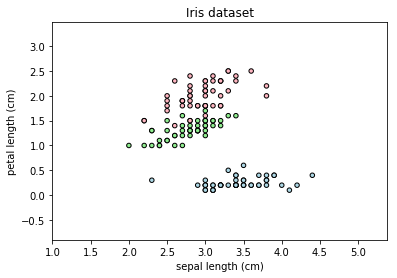

In [93]:
cmap_bold = ListedColormap(['#ADD8E6', '#90EE90','#FFB6C1'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Iris dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.savefig("../lab-2-aminaghoul-master/sklearn_examples_iris")

(48400, 3)
(48400, 3)
(48400, 3)


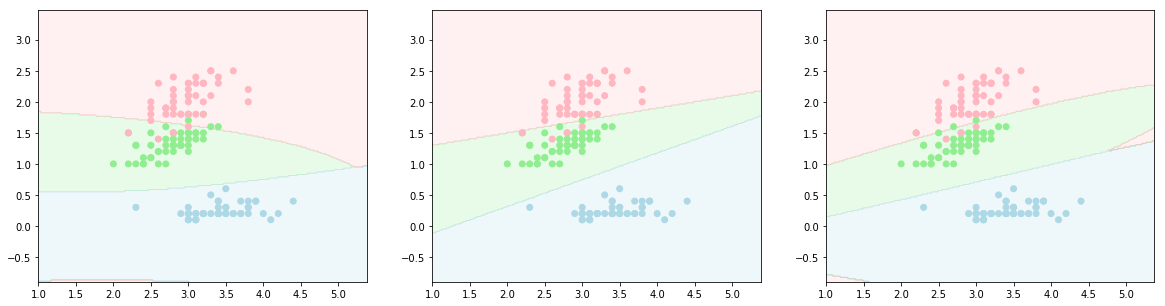

In [112]:
figure = plt.figure(figsize=(20, 5))
h = .02  # step size in the mesh
i=0
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

for name, clf in zip(names, classifiers):
    i += 1
    ax = plt.subplot(1, len(classifiers), i)
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z_p = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    
    #print(Z_p.shape)
    
    # Put the result into a color plot
    Z = np.argmax(Z_p,axis=1) + 1
    Z = Z.reshape(xx.shape)
   
    ax.contourf(xx, yy, Z, cmap=cmap_bold, alpha=0.2)

    # Plot also the points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    

In [95]:
len(np.arange(x_min, x_max, h))*len(np.arange(y_min, y_max, h))

48400

In [96]:
np.c_[xx.ravel(), yy.ravel()].shape

(48400, 2)

In [97]:
Z

array([[3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       ..., 
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=int64)

In [98]:
Z = np.argmax(Z_p,axis=1) + 1
print(len(np.c_[xx.ravel(), yy.ravel()]))
print(Z.shape[0])

48400
48400


# 2. Dataset Vowel


https://web.stanford.edu/~hastie/ElemStatLearn/data.html

In [99]:
train=pd.read_csv('vowel.train.csv', sep=',',index_col=0)
train.head

<bound method NDFrame.head of             y    x.1    x.2    x.3    x.4    x.5    x.6    x.7    x.8    x.9  \
row.names                                                                      
1           1 -3.639  0.418 -0.670  1.779 -0.168  1.627 -0.388  0.529 -0.874   
2           2 -3.327  0.496 -0.694  1.365 -0.265  1.933 -0.363  0.510 -0.621   
3           3 -2.120  0.894 -1.576  0.147 -0.707  1.559 -0.579  0.676 -0.809   
4           4 -2.287  1.809 -1.498  1.012 -1.053  1.060 -0.567  0.235 -0.091   
5           5 -2.598  1.938 -0.846  1.062 -1.633  0.764  0.394 -0.150  0.277   
6           6 -2.852  1.914 -0.755  0.825 -1.588  0.855  0.217 -0.246  0.238   
7           7 -3.482  2.524 -0.433  1.048 -1.995  0.902  0.322  0.450  0.377   
8           8 -3.941  2.305  0.124  1.771 -1.815  0.593 -0.435  0.992  0.575   
9           9 -3.860  2.116 -0.939  0.688 -0.675  1.679 -0.512  0.928 -0.167   
10         10 -3.648  1.812 -1.378  1.578  0.065  1.577 -0.466  0.702  0.060   
11        

In [100]:
test=pd.read_csv('vowel.test.csv', sep=',',index_col=0)
test.head

<bound method NDFrame.head of             y    x.1    x.2    x.3    x.4    x.5    x.6    x.7    x.8    x.9  \
row.names                                                                      
1           1 -1.149 -0.904 -1.988  0.739 -0.060  1.206  0.864  1.196 -0.300   
2           2 -2.613 -0.092 -0.540  0.484  0.389  1.741  0.198  0.257 -0.375   
3           3 -2.505  0.632 -0.593  0.304  0.496  0.824 -0.162  0.181 -0.363   
4           4 -1.768  1.769 -1.142 -0.739 -0.086  0.120 -0.230  0.217 -0.009   
5           5 -2.671  3.155 -0.514  0.133 -0.964  0.234 -0.071  1.192  0.254   
6           6 -2.509  1.326  0.354  0.663 -0.724  0.418 -0.496  0.713  0.638   
7           7 -2.764  1.111  0.727  1.540 -0.855  0.261 -1.110  0.227  0.420   
8           8 -3.816  3.426  0.224 -0.384 -1.733  0.434 -0.322  1.333  0.653   
9           9 -3.839  1.248  0.830  0.982 -1.110  0.617 -0.751  0.084  0.309   
10         10 -4.982  1.538  0.960  1.253 -0.640  0.588 -0.484 -0.310 -0.246   
11        

Répéter l'analyse faite sur le dataset iris avec les données vowel.

(528, 11)
(462, 11)


array([48, 48, 48, 48, 48, 48, 48, 48, 48, 48], dtype=int64)

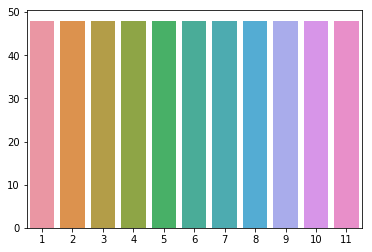

In [101]:
print(train.shape)
print(test.shape)
#label discret pb de classification multiclasse à 11 classes on vérifie si le nombre d'observations par classes class balancing est bien équilibré.
np.unique(train['y'])
#représenter la distribution des y

sns.barplot(np.unique(train['y']),train.groupby('y').count().values[:,0])

train.groupby('y').count().values[0,:]

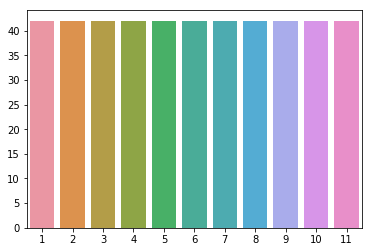

In [102]:
sns.barplot(np.unique(test['y']),test.groupby('y').count().values[:,0])
#Les classes sont bien équilibrés sur le train et le test

In [127]:
#On définit les matrices X_train et X_test de features et les vecteurs de Y_train et Y_test de label Create a Gaussian Classifier
train.values
Y_train=train.values[:,0]
X_train=train.values[:,1:]
print(X_train.shape)
train.values
Y_test=test.values[:,0]
X_test=test.values[:,1:]
print(Y_train.shape)


(528, 10)
(528,)


array([-3.639,  0.418, -0.67 , ...,  0.05 , -0.112,  0.321])

# Machine learning


# Naive Bayes

In [166]:
names = ["Naive Bayes", "LDA", "QDA"]
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]
for name, clf in zip(names, classifiers):
    i += 1
    clf.fit(X=X_train,y=Y_train)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z_p = clf.fitpredict(np.c_[X_train.ravel(), Y_train.ravel()])
   
NB=GaussianNB()
NB_fit=NB.fit(X=X_train,y=Y_train)
print("Le score sur le train est" ,accuracy_score(NB_fit.predict(X_train),Y_train))
print("Le score sur le train est",accuracy_score(NB_fit.predict(X_test),Y_test))



AttributeError: 'GaussianNB' object has no attribute 'fitpredict'

# LDA 

In [110]:
lda = LinearDiscriminantAnalysis()
lda_fit = lda.fit(X=X_train, y=Y_train)
print("Le score sur le train est" ,accuracy_score(lda_fit.predict(X_train),Y_train))
print("Le score sur le train est",accuracy_score(lda_fit.predict(X_test),Y_test))

Le score sur le train est 0.683712121212
Le score sur le train est 0.443722943723


# QDA

In [111]:
qda = QuadraticDiscriminantAnalysis()
qda_fit = qda.fit(X=X_train, y=Y_train)
print("Le score sur le train est" ,accuracy_score(qda_fit.predict(X_train),Y_train))
print("Le score sur le train est",accuracy_score(qda_fit.predict(X_test),Y_test))

Le score sur le train est 0.988636363636
Le score sur le train est 0.471861471861


<img src="https://media1.giphy.com/media/LNXivXzMwd7W0/giphy.gif" width = 300>
<a id="3"></a> 
 
# 3. k-NN

https://openclassrooms.com/courses/initiez-vous-au-machine-learning/tp-entrainez-le-modele-des-k-plus-proches-voisins-k-nn

Utiliser l'algo k-NN pour différents k et comparez ses performances avec les méthodes précédentes.

In [167]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
error = 1 - knn.score(X_test, Y_test)
print('Erreur: %f' % error)

Erreur: 0.435065


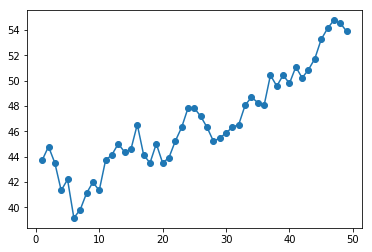

5


In [168]:
errors = []
acc_train=[]
acc_test=[]

for k in range(1,50):
    knn = neighbors.KNeighborsClassifier(k)
    knn_fit=knn.fit(X=X_train,y=Y_train)
    errors.append(100*(1 - knn.fit(X_train, Y_train).score(X_test, Y_test)))
    acc_train.append(accuracy_score(knn_fit.predict(X_train),Y_train))
    acc_test.append(accuracy_score(knn_fit.predict(X_test),Y_test))
    
plt.plot(range(1,50), errors, 'o-')
plt.show()
print(np.argmin(errors))
k_hat=np.argmax(acc_test)

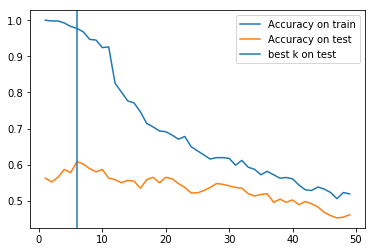

In [169]:
plt.plot(np.arange(1,50),acc_train,label="Accuracy on train")
plt.plot(np.arange(1,50),acc_test, label="Accuracy on test")
plt.axvline(np.arange(1,50)[k_hat],label="best k on test")
plt.legend()